In [2]:
!pip install fpdf

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to

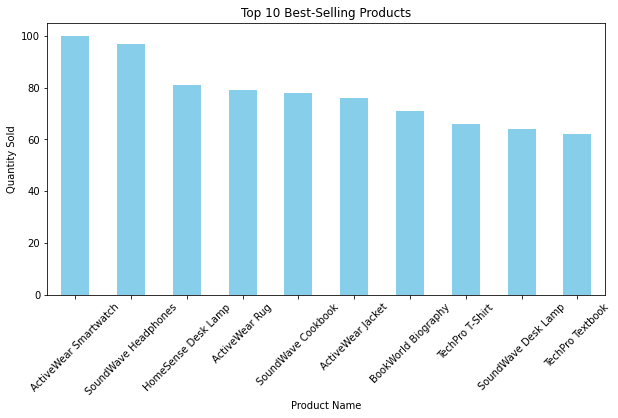

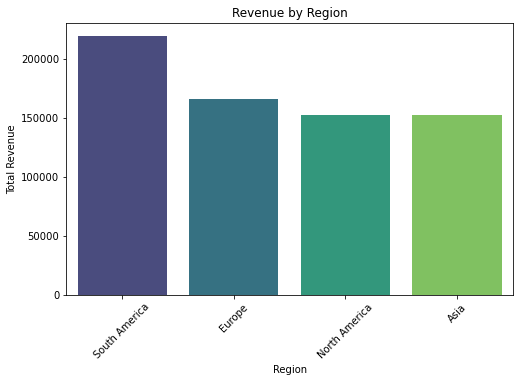

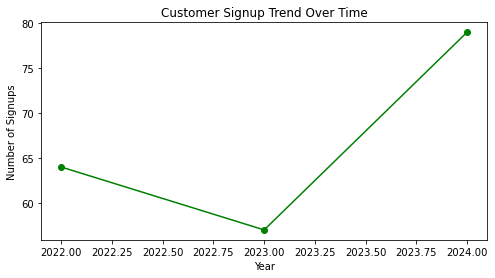

Insights :
1. The most sold product is ActiveWear Smartwatch with 100 units sold.
2. The highest revenue-generating region is South America with $219352.56.
3. Customer signups peaked in 2024 with 79 new signups.
4. The distribution of revenue across customer segments shows that 61.25% of revenue comes from first-time buyers and 38.75% comes from repeat buyers. This balance is key to understanding the customer lifecycle and could indicate opportunities for converting first-time buyers into repeat customers by offering them personalized incentives.
5. Purchases peak during the months of 7 with a total sales volume of 267.
Report generated and also saved


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from fpdf import FPDF

# Loading datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Converting dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge data for analysis
merged_df = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

# Initialize PDF document
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="EDA and Business Data Analysis Report", ln=True, align='C')



# Basic EDA
print("Customers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())

# Summary statistics
print("\nSummary Statistics:")
print(merged_df.describe())

# Missing values check
print("\nMissing Values:")
print(merged_df.isnull().sum())

# Top selling products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# Revenue per region
revenue_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='viridis')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Customer signup trends
timeline = customers.groupby(customers['SignupDate'].dt.year).count()
plt.figure(figsize=(8, 4))
plt.plot(timeline.index, timeline['CustomerID'], marker='o', linestyle='-', color='green')
plt.title("Customer Signup Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


# Business Insights
insights = [
    "1. The most sold product is {} with {} units sold.".format(top_products.idxmax(), top_products.max()),
    "2. The highest revenue-generating region is {} with ${:.2f}.".format(revenue_by_region.idxmax(), revenue_by_region.max()),
    "3. Customer signups peaked in {} with {} new signups.".format(timeline.idxmax()[0], timeline['CustomerID'].max()),
    "4. The distribution of revenue across customer segments shows that {}% of revenue comes from first-time buyers and {}% comes from repeat buyers. This balance is key to understanding the customer lifecycle and could indicate opportunities for converting first-time buyers into repeat customers by offering them personalized incentives.".format(
        round((merged_df[merged_df['CustomerID'].isin(customers[customers['SignupDate'] < merged_df['TransactionDate'].min()]['CustomerID'])]['TotalValue'].sum()/merged_df['TotalValue'].sum())*100, 2),
        round((merged_df[merged_df['CustomerID'].isin(customers[customers['SignupDate'] >= merged_df['TransactionDate'].min()]['CustomerID'])]['TotalValue'].sum()/merged_df['TotalValue'].sum())*100, 2)
    ),
    "5. Purchases peak during the months of {} with a total sales volume of {}.".format(
        merged_df.groupby(merged_df['TransactionDate'].dt.month)['Quantity'].sum().idxmax(),
        merged_df.groupby(merged_df['TransactionDate'].dt.month)['Quantity'].sum().max()
    ),
]

print("Insights :")
for insight in insights:
    print(insight)
pdf.ln(10)  # Line break
pdf.cell(200, 10, txt="Arvind Agarwal EDA & Business Insights:", ln=True)
for insight in insights:
    pdf.multi_cell(0, 10, txt=insight, align='L')

# Output PDF
output_pdf_path = 'Arvind_Agarwal_EDA.pdf'
pdf.output(output_pdf_path)

print(f"Report generated and also saved")
